In [27]:
#Import library
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [28]:
# Some configs
plt.rcParams['figure.figsize'] = (10,8)
plt.rcParams['figure.dpi'] = 200
plt.rcParams['font.size'] = 13

In [29]:
# Load data
df = pd.read_csv('./data/Insurance.csv')
y = df['bought_insurance']
x = df['age']
x = sm.add_constant(x)

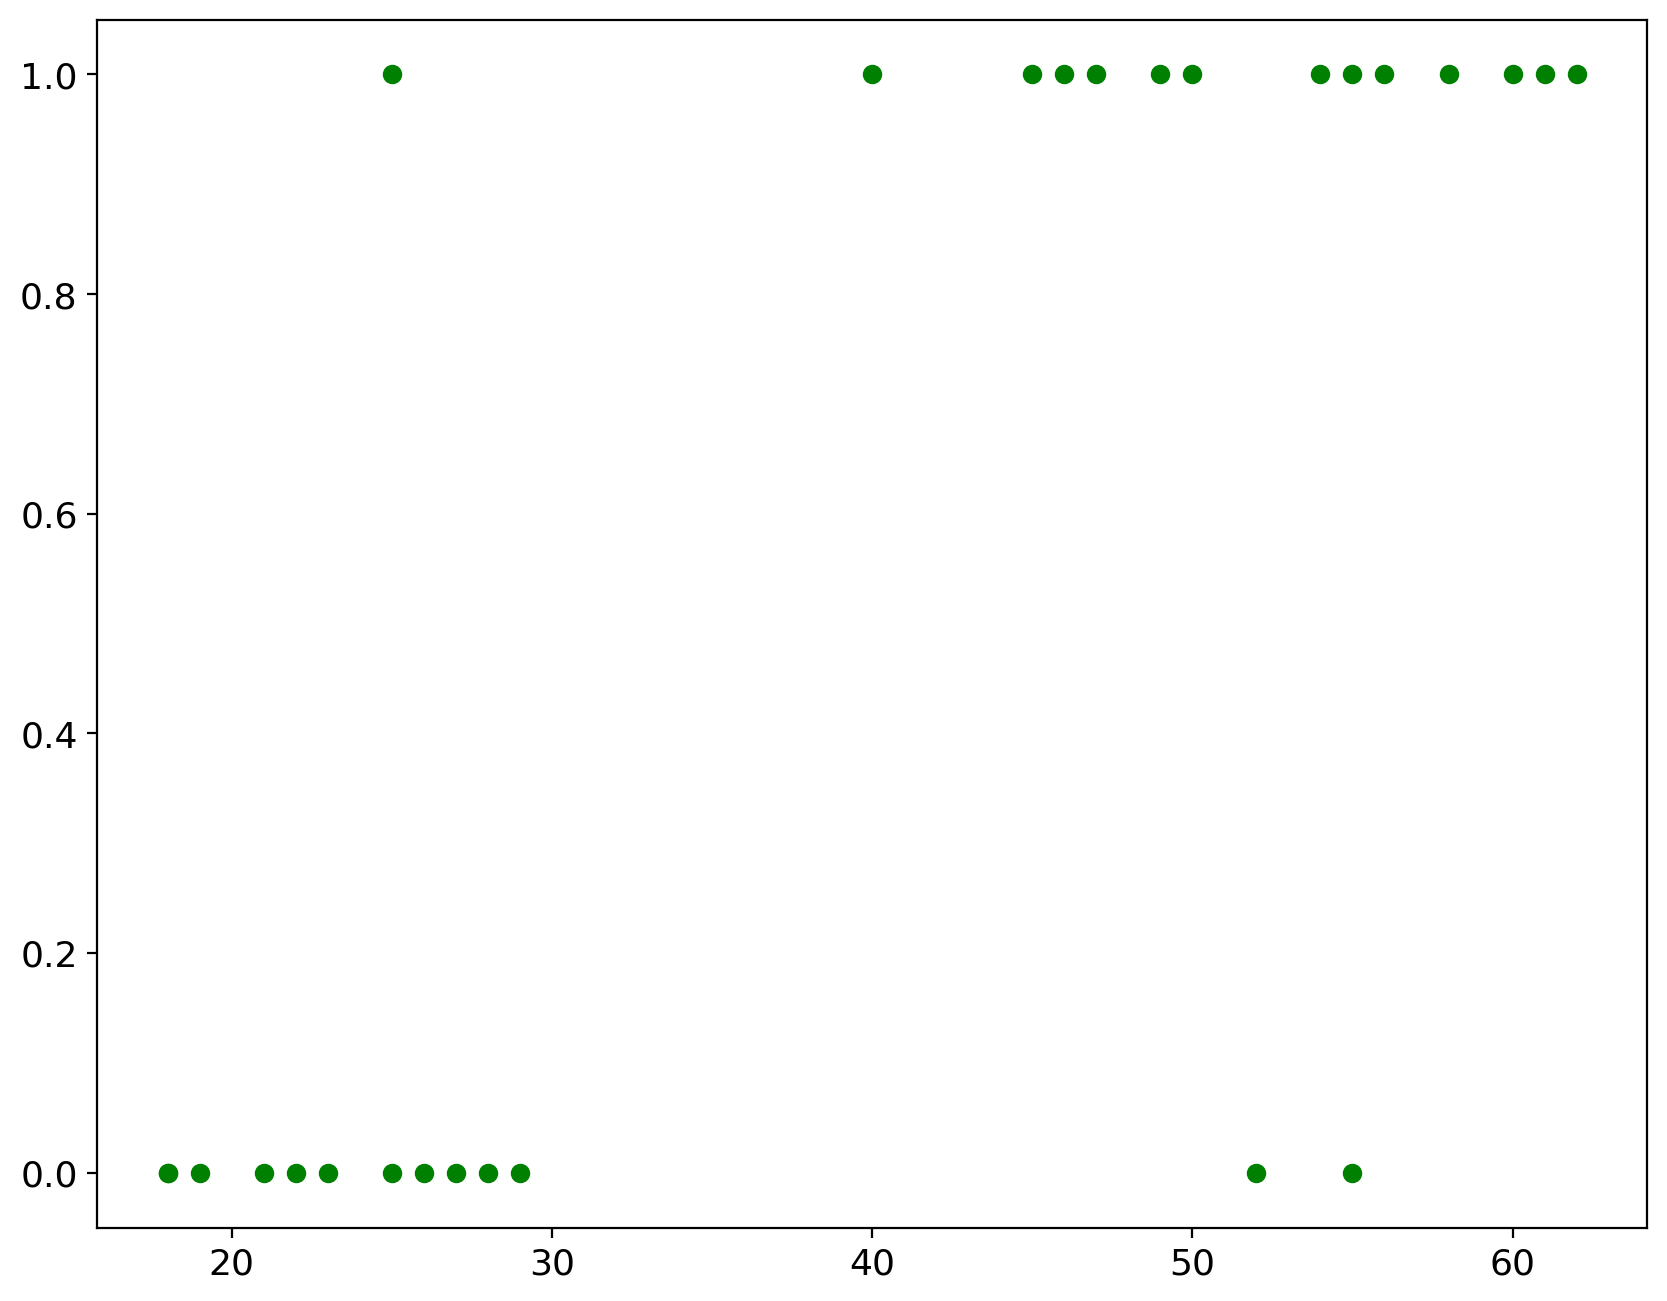

In [30]:
plt.scatter(df['age'], df['bought_insurance'], color="green", marker='o')

In [31]:
# Create model and train it
model = sm.Logit(y, x)
results = model.fit(method='newton')

Optimization terminated successfully.
         Current function value: 0.377894
         Iterations 6


In [32]:
# Get results and evaluate the model
coefs = results.params
# results.summary()

In [33]:
prob_matrix = results.predict(x)
y_pred = (results.predict(x) >= 0.5).astype(int)

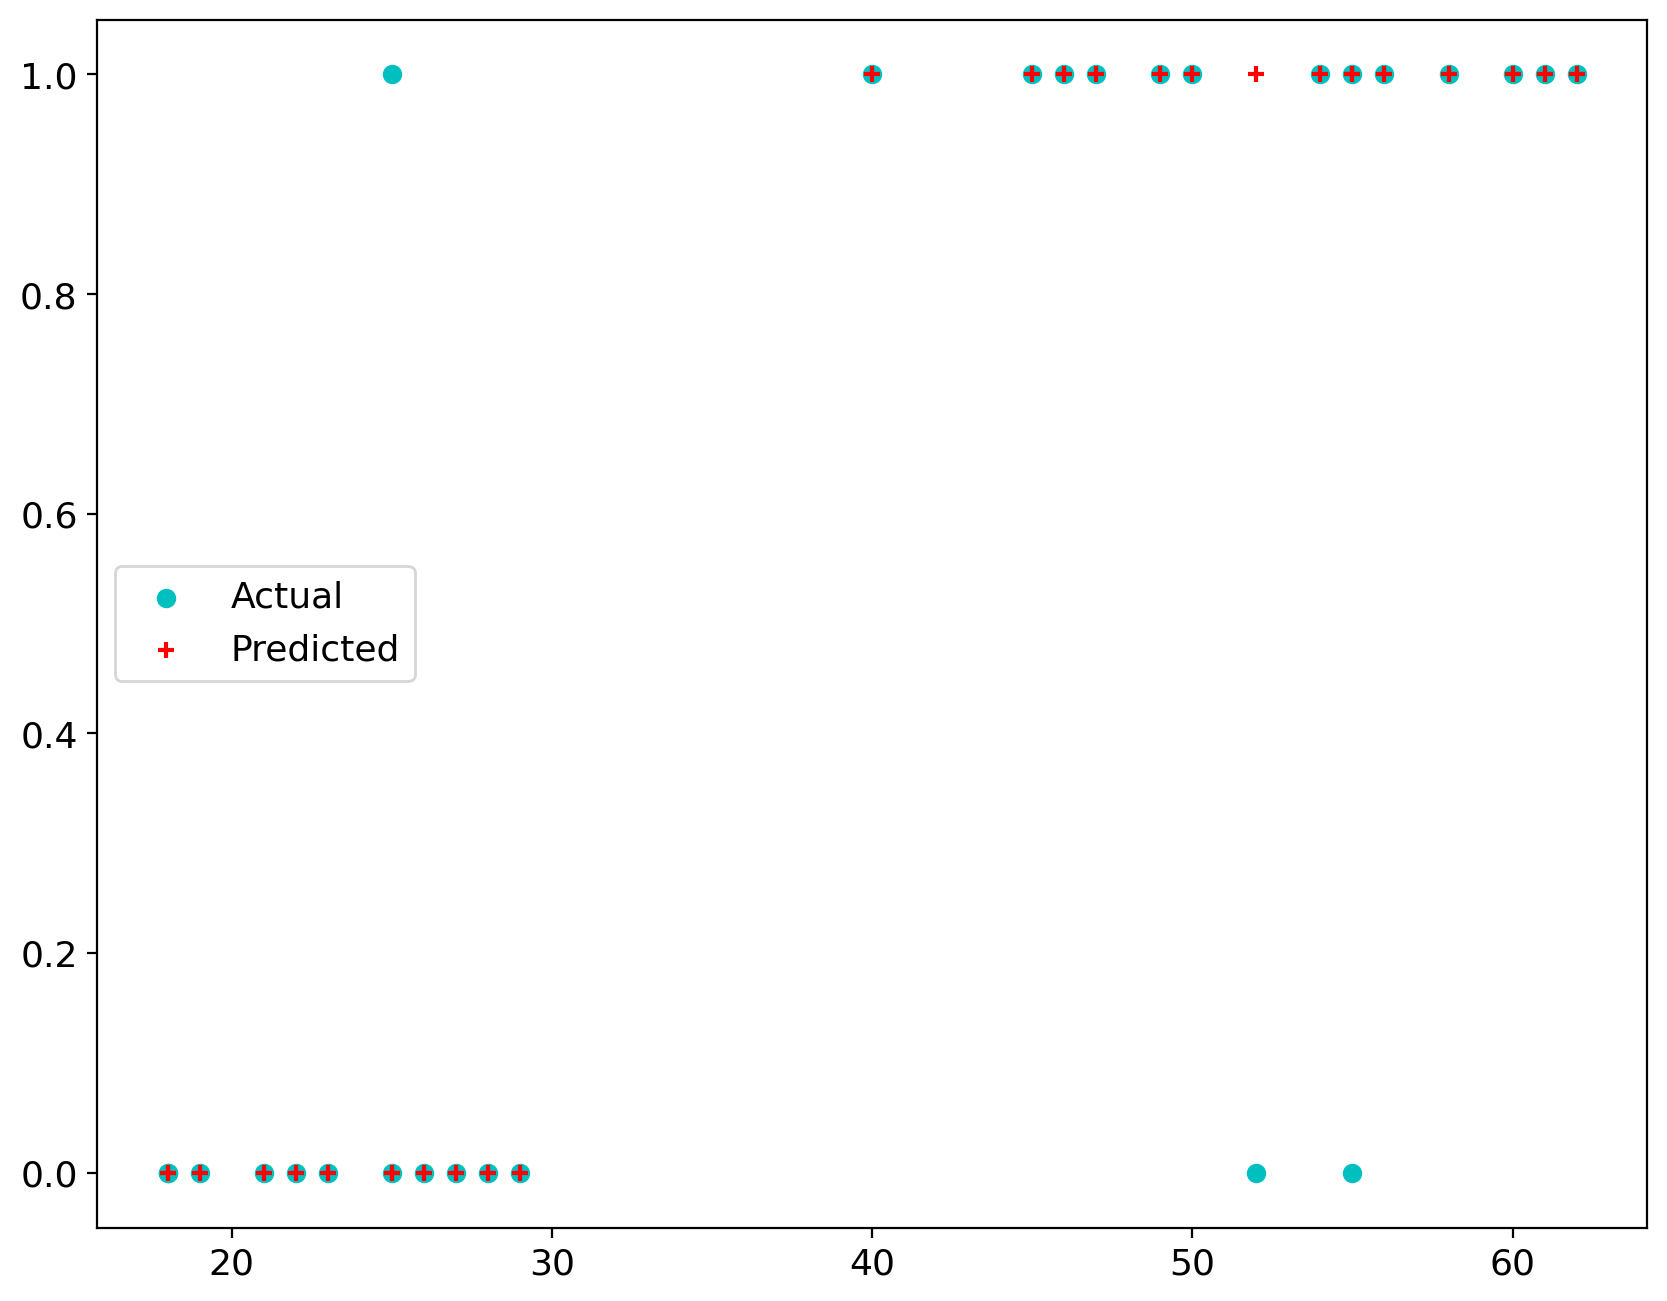

In [34]:
plt.scatter(df['age'], df.bought_insurance, color="c", marker='o', label='Actual')
plt.scatter(df['age'], y_pred, color="r", marker='+', label='Predicted')
plt.legend(loc='center left')

In [35]:
from sklearn.metrics import confusion_matrix, accuracy_score
# confusion matrix
cm = confusion_matrix(y, y_pred)
cm2 = results.pred_table()
print ("Confusion Matrix : \n", cm)
# accuracy score of the model
print('Test accuracy = ', accuracy_score(y, y_pred))

Confusion Matrix : 
 [[11  2]
 [ 1 13]]
Test accuracy =  0.8888888888888888


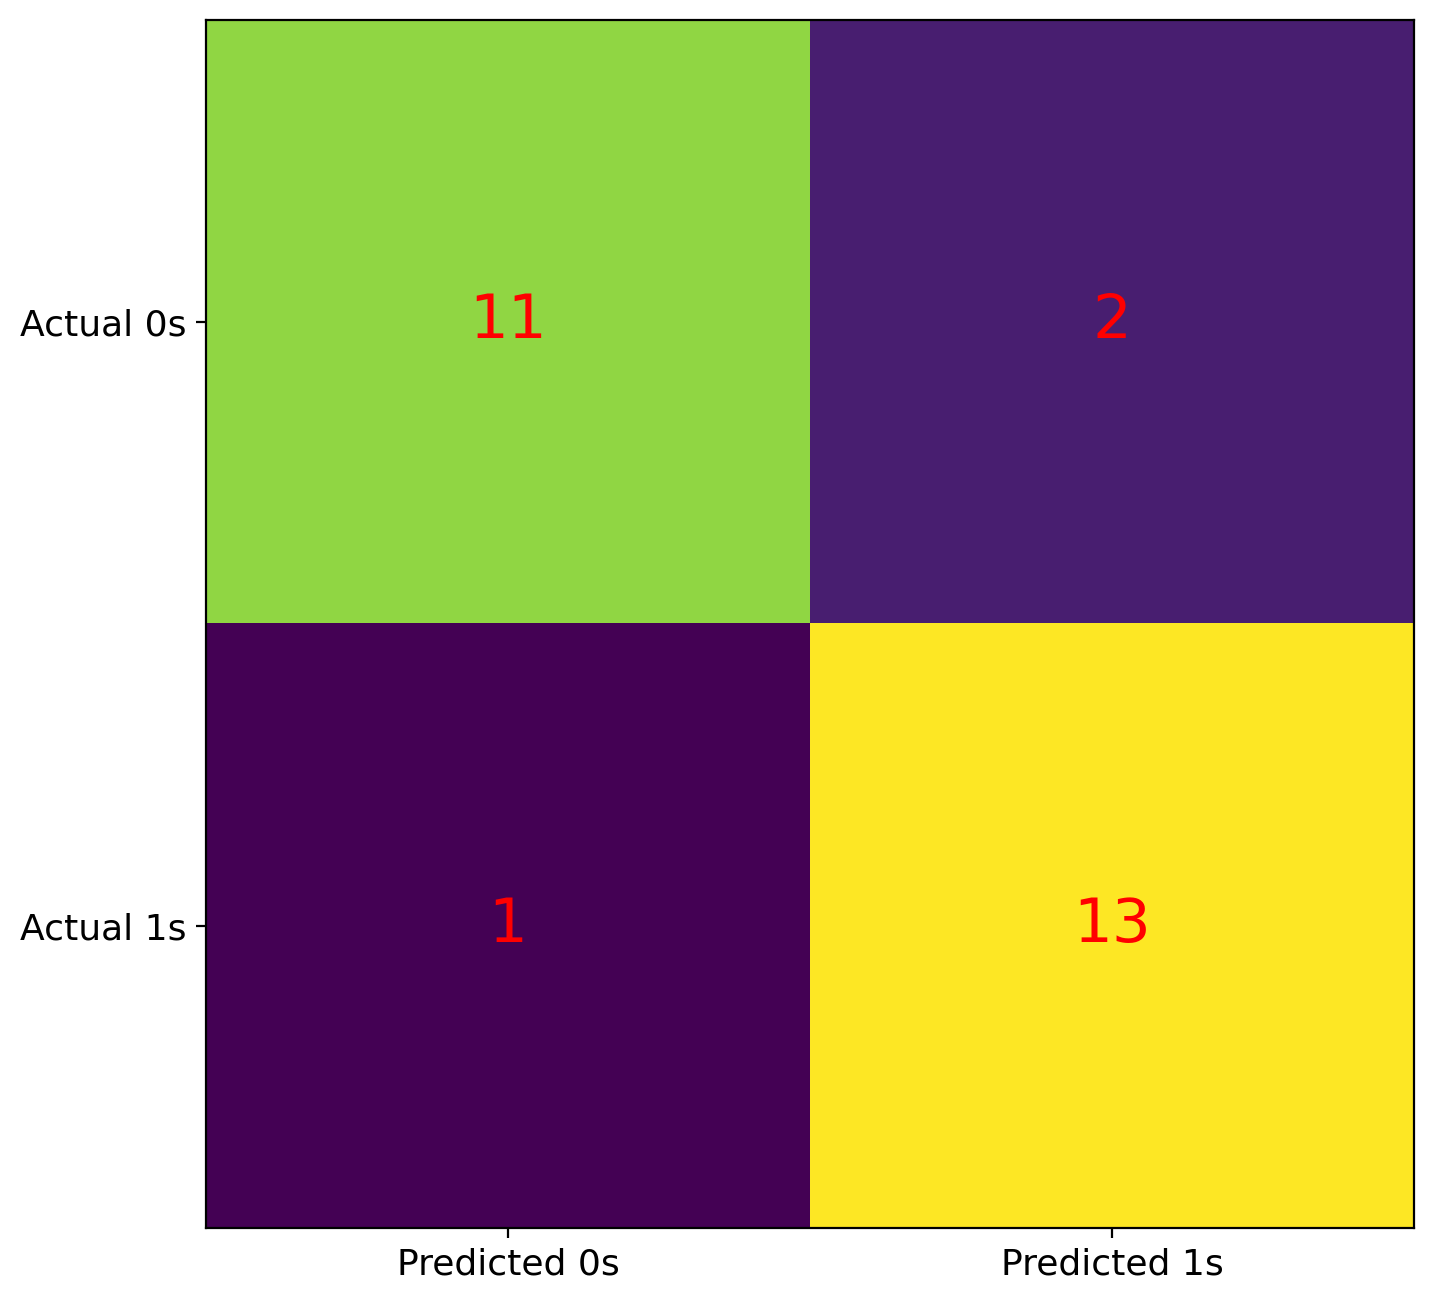

In [37]:
fig, ax = plt.subplots()
ax.imshow(cm)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='r', fontsize=22)
plt.show()